In [6]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Carrega a base
dataset = pd.read_csv("/content/Pos MLs04b Celsius para Fahrenheit.csv")
dataset.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [19]:
X = dataset['Celsius'].values.reshape(-1, 1)
y = dataset['Fahrenheit'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DataFrame com reshape
reshaped_dataset = pd.DataFrame({'Celsius': X.flatten(), 'Fahrenheit': y.flatten()})
reshaped_dataset.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [11]:
# Definição do modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

In [32]:
# Compilação do modelo
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

In [37]:
# Treinando o modelo
epochs_hist = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
1/1 [==============================] - 0s 115ms/step - loss: 45.4267 - mae: 45.4267 - val_loss: 25.9600 - val_mae: 25.9600
Epoch 2/500
1/1 [==============================] - 0s 51ms/step - loss: 45.4074 - mae: 45.4074 - val_loss: 25.9512 - val_mae: 25.9512
Epoch 3/500
1/1 [==============================] - 0s 70ms/step - loss: 45.3880 - mae: 45.3880 - val_loss: 25.9423 - val_mae: 25.9423
Epoch 4/500
1/1 [==============================] - 0s 76ms/step - loss: 45.3684 - mae: 45.3684 - val_loss: 25.9335 - val_mae: 25.9335
Epoch 5/500
1/1 [==============================] - 0s 95ms/step - loss: 45.3488 - mae: 45.3488 - val_loss: 25.9246 - val_mae: 25.9246
Epoch 6/500
1/1 [==============================] - 0s 164ms/step - loss: 45.3291 - mae: 45.3291 - val_loss: 25.9157 - val_mae: 25.9157
Epoch 7/500
1/1 [==============================] - 0s 74ms/step - loss: 45.3092 - mae: 45.3092 - val_loss: 25.9067 - val_mae: 25.9067
Epoch 8/500
1/1 [==============================] - 0s 77ms/s

In [38]:
# Avaliação do modelo
loss = model.evaluate(X_test, y_test)
print(f"Perda: {loss}")

1/1 [==============================] - 0s 27ms/step - loss: 19.5474 - mae: 19.5474
Perda: [19.54741668701172, 19.54741668701172]


In [39]:
model.get_weights()

[array([[ 8.1718880e-01, -1.2186219e-02, -1.0978903e+00, -8.8469177e-01,
          8.3447111e-01, -1.8841956e-02, -4.6445895e-02, -9.6724212e-01,
         -5.2573560e-03,  9.9030328e-01,  4.5336805e-02, -9.2058110e-01,
          9.6067095e-01, -1.0341812e+00,  2.3766687e-02, -2.6539002e-02,
          8.8545555e-01,  9.7751331e-01,  1.0486939e+00,  5.9167243e-04,
          8.0708528e-01,  1.0262891e+00,  6.2657759e-02, -9.6107644e-01,
          1.1510074e+00,  9.5270485e-01, -8.6536452e-02, -6.0401171e-02,
         -9.8443526e-01, -2.2521526e-02, -1.5272865e-02, -9.6746987e-01,
          8.3715093e-01, -6.3868552e-02, -1.0896517e+00, -4.5247514e-02,
         -8.6367780e-01, -9.1957146e-01, -8.5346413e-01,  1.0342442e+00,
         -1.0321964e+00,  3.3314715e-03,  8.5106254e-01, -8.9955056e-01,
          6.1761808e-02, -9.3170178e-01,  1.1290606e-02,  8.5749263e-01,
          8.9406008e-01, -7.7552480e-01, -1.0012773e+00,  1.1103661e+00,
         -9.7511840e-01,  9.3207115e-01, -8.0279016

In [40]:
# Previsões
predictions = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


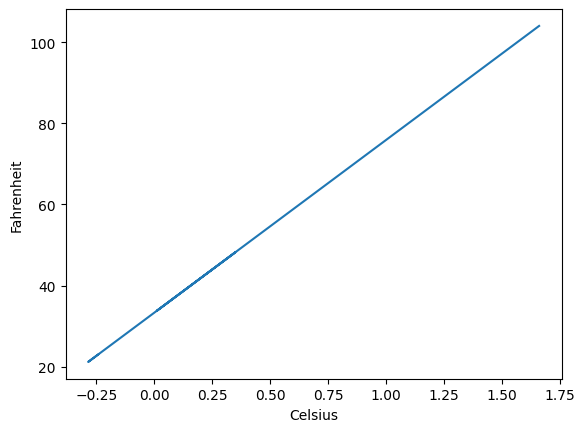

In [42]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_test)
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()